In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns.tolist()

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [9]:
df['Current Year'] = 2020

In [10]:
df['No. of year Car used'] = df['Current Year']- df['Year']

In [11]:
col = ['Current Year','Car_Name','Year']
df.drop(columns=col,inplace=True,axis=1)

In [12]:
df=pd.get_dummies(df,drop_first=True)

In [13]:
df.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,No. of year Car used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['Fuel_Type_Diesel'] = le.fit_transform(df['Fuel_Type_Diesel'])

In [17]:
df['Fuel_Type_Petrol'] = le.fit_transform(df['Fuel_Type_Petrol'])

In [18]:
df['Seller_Type_Individual'] = le.fit_transform(df['Seller_Type_Individual'])

In [19]:
df['Transmission_Manual'] = le.fit_transform(df['Transmission_Manual'])

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No. of year Car used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [21]:
X= df[['Owner',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual',
 'No. of year Car used']].values
Y = df['Selling_Price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfc = RandomForestRegressor()

In [26]:
rfc.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
pred = rfc.predict(X_test)
pred

array([ 2.6305,  5.6345,  0.4486,  2.276 , 10.6078,  1.0777,  4.5165,
        5.2416,  5.4449,  0.4704,  2.9905,  1.022 ,  4.9065,  4.7295,
        4.583 ,  0.5689,  8.493 ,  7.1206,  2.777 ,  7.9668,  6.7306,
        5.671 ,  6.25  ,  8.225 ,  4.443 ,  0.583 ,  0.5776,  2.2456,
       11.2691,  0.4163,  4.8025,  0.4498,  1.191 , 22.3284,  4.4915,
        6.9814,  3.298 ,  4.6735,  0.4161,  0.2399,  2.8695,  5.0955,
        0.4554,  0.4684,  9.567 , 15.9626,  0.3621,  4.0345,  0.4237,
        0.42  ,  0.3059,  0.4946,  2.9191,  5.0484,  7.402 ,  7.768 ,
        6.592 ,  4.7764,  5.1415,  2.9945,  1.5905])

C:\Users\anuku\AppData\Local\Temp\ipykernel_23116\3108594178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<AxesSubplot: xlabel='Selling_Price', ylabel='Density'>

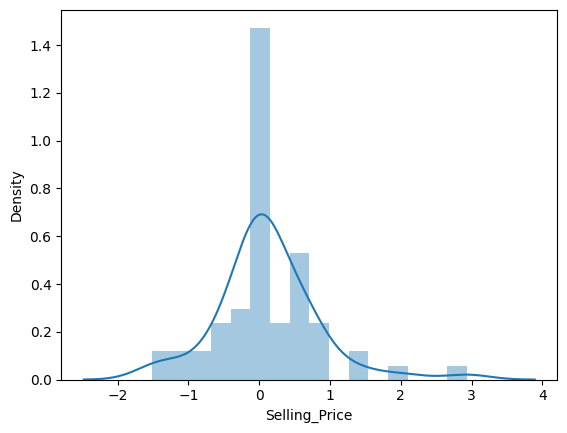

In [28]:
sns.distplot(Y_test-pred)


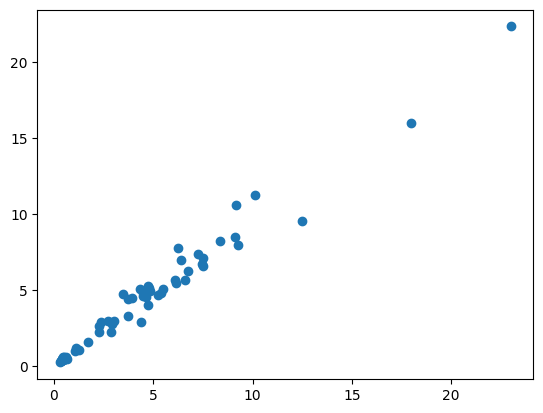

In [29]:
plt.scatter(Y_test,pred)

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 0.47529508196721315
MSE: 0.5351362626229511
RMSE: 0.7315300831975067


In [32]:
import pickle

In [33]:
pickle.dump(rfc,open('model.pkl','wb'))

In [34]:
df.iloc[:,1:].columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'No. of year Car used',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [35]:
df.iloc[:,0]

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64